In [1]:
import numpy as np, matplotlib.pyplot as plt

# Coin

## Effect of the proportionality factor

In [ ]:
p_real = 0.4

def toss(k=1):
  return np.random.binomial(1,p_real*k)

def likelihood(outcome, p, k):
  l = p*k if outcome==1 else 1-p*k
  return l

def cumulative_likelihood(outcome_list, p, k):
  cl = np.product([likelihood(outcome,p,k) for outcome in outcome_list])
  return cl

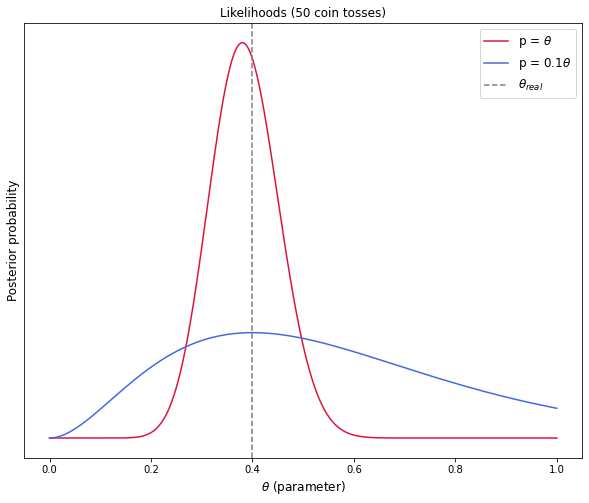

In [ ]:
nexp = 50

min, max = 0, 1

def get_likelihoods(k, axs, new_data = False):
  if new_data:
      outcome_list = [toss(k=k) for i in range(nexp)]
  else:
      outcome_list = ([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] if k==1 else [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
  xs = np.linspace(min,max,1000)
  ys = [cumulative_likelihood(outcome_list, x, k) for x in xs]
  PD = np.sum(ys)/len(xs)
  ys = ys/PD #np.sum(ys) for discrete normalization
  label = r"p = $θ$" if k==1 else (r"p = $%.1fθ$" % k)
  color = "crimson" if k==1 else "royalblue"
  axs.plot(xs,ys,label=label,color=color)
  return outcome_list

def plot_likelihoods(mark_frequentist = True, second_k = True):
  fig, axs = plt.subplots(1,figsize=(10,8))
  outcome_list = get_likelihoods(1, axs)
  if second_k:
      get_likelihoods(0.1, axs)
  elif mark_frequentist: # Otherwise there are two estimates and it's off the point, just omit
    freq_guess = np.sum(outcome_list)/len(outcome_list)
    plt.axvline(freq_guess, color="royalblue", label = r"$θ_{freq}$")

  plt.axvline(p_real, color="gray", linewidth=1.5, linestyle='dashed', 
              label = r"$θ_{real}$")
  axs.yaxis.set_ticks([])
  axs.legend(fontsize=12)
  plt.title("Likelihoods (%d coin tosses)" % nexp, fontsize=12)
  axs.set_xlabel("$θ$ (parameter)", fontsize=12)
  axs.set_ylabel("Posterior probability", fontsize=12)
  plt.show()

plot_likelihoods()

## Scatter

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0]
35 65
1.0


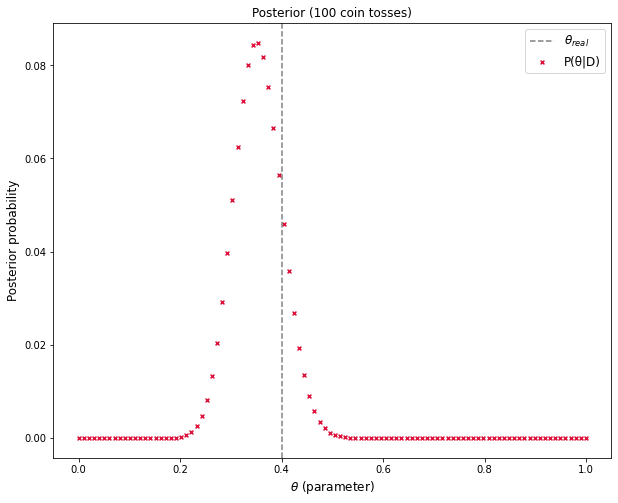

In [ ]:
nexp = 100
min, max = 0, 1

def get_posterior(k, axs, normalize="discrete", interpolate=False):
  #outcome_list = [toss(k=k) for i in range(nexp)]
  outcome_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0]
  print("%s" % outcome_list)
  s = sum(outcome_list)
  f = len(outcome_list) - s
  print(s,f)
  xs = np.linspace(min,max,1000 if interpolate else 100)
  ys = [cumulative_likelihood(outcome_list, x, k) for x in xs]
  PD = np.sum(ys)/len(xs)
  factor = PD if normalize=="continuous" else np.sum(ys)
  ys = ys/factor
  print(np.sum(ys))

  color = "crimson" if k==1 else "royalblue"
  label = "L(θ|D)·P(θ)" if normalize is None else "P(θ|D)"
  if interpolate:
    axs.plot(xs,ys,label=label,color=color)
  else:
    axs.scatter(xs,ys,s=15,label=label,marker='x',c=color)
  return outcome_list

def plot_dist(mark_frequentist=False, normalized=True):
  fig, axs = plt.subplots(1,figsize=(10,8))
  outcome_list = get_posterior(1, axs)
  if mark_frequentist:
    freq_guess = np.sum(outcome_list)/len(outcome_list)
    plt.axvline(freq_guess, color="royalblue", label = r"$θ_{freq}$")
  plt.axvline(p_real, color="gray", linewidth=1.5, linestyle='dashed', 
              label = r"$θ_{real}$")
  if not normalized:
    axs.yaxis.set_ticks([])
  axs.legend(fontsize=12)
  plt.title("Posterior (%d coin tosses)" % nexp, fontsize=12)
  axs.set_xlabel("$θ$ (parameter)", fontsize=12)
  axs.set_ylabel("Posterior probability", fontsize=12)
  plt.show()

plot_dist()

## Comparing with a conjugate prior (beta distribution)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0]
Sucesses/failures:  35 65


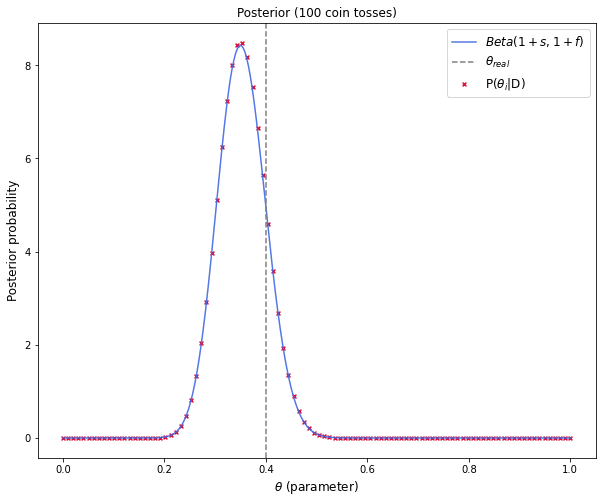

In [ ]:
from scipy.stats import beta

nexp = 100
min, max = 0, 1

def get_posterior(axs):
  #outcome_list = [toss(k=k) for i in range(nexp)]
  outcome_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0]
  print("%s" % outcome_list)
  s = sum(outcome_list)
  f = len(outcome_list) - s
  print("Sucesses/failures: ", s,f)
  xs = np.linspace(min,max,100)
  ys = [cumulative_likelihood(outcome_list, x, 1) for x in xs]
  PD = np.sum(ys)/len(xs)

  ys = ys/PD
  denser_xs =  np.linspace(min,max,1000)
  axs.plot(denser_xs, beta.pdf(denser_xs, 1+s, 1+f), alpha=0.9, label=r'$\it{Beta}(1+s,1+f)$',color="royalblue")
  axs.scatter(xs,ys,s=15,label=r"P($θ_i$|D)",marker='x',c="crimson")
  return outcome_list

def plot_conjugate_vs_points(mark_frequentist=False, normalized=True):
  fig, axs = plt.subplots(1,figsize=(10,8))
  outcome_list = get_posterior(axs)

  plt.axvline(p_real, color="gray", linewidth=1.5, linestyle='dashed', 
              label = r"$θ_{real}$")
  if not normalized:
    axs.yaxis.set_ticks([])
  axs.legend(fontsize=12)
  plt.title("Posterior (%d coin tosses)" % nexp, fontsize=12)
  axs.set_xlabel("$θ$ (parameter)", fontsize=12)
  axs.set_ylabel("Posterior probability", fontsize=12)
  plt.show()

plot_conjugate_vs_points()

## Probability mass function

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0]
1.0


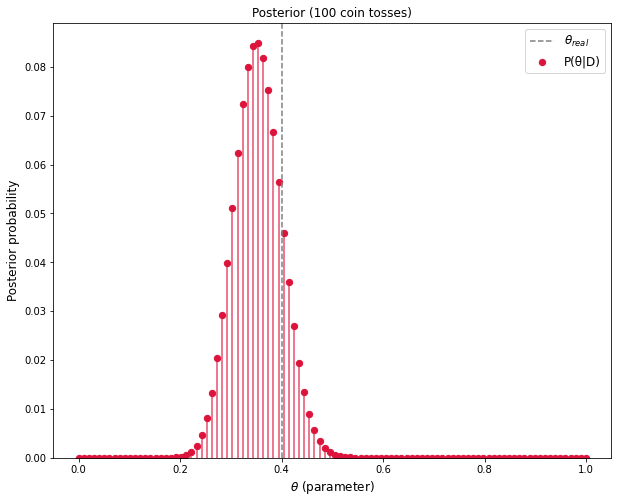

In [ ]:
nexp = 100
min, max = 0, 1

def get_posterior(k, axs, normalize="discrete", interpolate=False):
  #outcome_list = [toss(k=k) for i in range(nexp)]
  outcome_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0]
  print("%s" % outcome_list)
  npoints = 100
  xs = np.linspace(min,max,1000 if interpolate else npoints)
  ys = [cumulative_likelihood(outcome_list, x, k) for x in xs]
  PD = np.sum(ys)/len(xs)
  factor = PD if normalize=="continuous" else np.sum(ys)
  ys = ys/factor
  print(np.sum(ys))

  color = "crimson" if k==1 else "royalblue"
  label = "L(θ|D)·P(θ)" if normalize is None else "P(θ|D)"
  [axs.axvline(xs[i],ymax=ys[i]/axs.get_ylim()[1], color=color,alpha=0.75) for i in range(npoints)]
  axs.scatter(xs,ys,label=label,marker='o',color=color, s=40)
  # markerline, stemlines, baseline = axs.stem(xs,ys,label=label)
  # plt.setp(stemlines, 'color', color, 'alpha', 0.75)
  # plt.setp(markerline, 'color', color)
  return outcome_list

def plot_dist(normalized=True):
  fig, axs = plt.subplots(1,figsize=(10,8))
  plt.axvline(p_real, color="gray", linewidth=1.5, linestyle='dashed', 
              label = r"$θ_{real}$")
  axs.set_ylim(0, 0.089)
  outcome_list = get_posterior(1, axs)
  
  if not normalized:
    axs.yaxis.set_ticks([])
  axs.legend(fontsize=12)
  plt.title("Posterior (%d coin tosses)" % nexp, fontsize=12)
  axs.set_xlabel("$θ$ (parameter)", fontsize=12)
  axs.set_ylabel("Posterior probability", fontsize=12)
  plt.show()

plot_dist()


## Log-probability

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


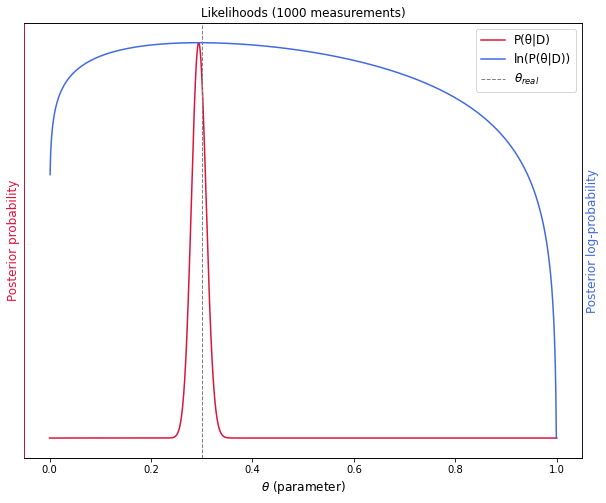

In [ ]:
def measure(t):
  return np.random.binomial(1, w_real)

def simulate_likelihood(w, t, outcome):
  l = w if outcome==1 else 1 - w
  return l

def likelihoods(data, w):
  ls = [simulate_likelihood(w, t, outcome) for t,outcome in data]
  return ls

w_real = 0.3
min, max = 0, 1

def plot_likelihood_aux(data, axs, which, tmax, nexp, log=True):
  xs = np.linspace(min,max,1000)
  lss = [likelihoods(data, x) for x in xs]
  ys = [np.product(ls) for ls in lss]
  #ys = [y*len(xs)/np.sum(ys) for y in ys]
  if log:
    ys = [np.sum([np.log(l) for l in ls]) for ls in lss]
  label = "ln(P(θ|D))"if log else "P(θ|D)"
  color = "crimson" if which==1 else "royalblue"
  axs.plot(xs,ys,label=label,color=color)

def plot_likelihoods(both = True, new_data = False):
  global nexp
  fig, axs = plt.subplots(1,figsize=(10,8))

  tmax = 10
  nexp = 1000
  note = " (%d measurements)" % (nexp)

  ts = np.linspace(0,tmax,nexp)
  data = [(t,measure(t)) for t in ts] if new_data else [(0.0, 1), (0.01001001001001001, 0), (0.02002002002002002, 0), (0.03003003003003003, 0), (0.04004004004004004, 0), (0.050050050050050046, 0), (0.06006006006006006, 0), (0.07007007007007007, 1), (0.08008008008008008, 0), (0.09009009009009009, 0), (0.10010010010010009, 0), (0.11011011011011011, 0), (0.12012012012012012, 1), (0.13013013013013014, 1), (0.14014014014014015, 1), (0.15015015015015015, 0), (0.16016016016016016, 1), (0.17017017017017017, 0), (0.18018018018018017, 0), (0.19019019019019018, 0), (0.20020020020020018, 1), (0.21021021021021022, 0), (0.22022022022022023, 0), (0.23023023023023023, 0), (0.24024024024024024, 0), (0.2502502502502503, 0), (0.2602602602602603, 0), (0.2702702702702703, 0), (0.2802802802802803, 1), (0.2902902902902903, 0), (0.3003003003003003, 1), (0.3103103103103103, 0), (0.3203203203203203, 0), (0.3303303303303303, 0), (0.34034034034034033, 0), (0.35035035035035034, 0), (0.36036036036036034, 0), (0.37037037037037035, 0), (0.38038038038038036, 0), (0.39039039039039036, 0), (0.40040040040040037, 1), (0.41041041041041043, 1), (0.42042042042042044, 0), (0.43043043043043044, 0), (0.44044044044044045, 1), (0.45045045045045046, 0), (0.46046046046046046, 0), (0.47047047047047047, 0), (0.4804804804804805, 0), (0.4904904904904905, 0), (0.5005005005005005, 0), (0.5105105105105106, 0), (0.5205205205205206, 1), (0.5305305305305306, 0), (0.5405405405405406, 1), (0.5505505505505506, 1), (0.5605605605605606, 1), (0.5705705705705706, 0), (0.5805805805805806, 0), (0.5905905905905906, 1), (0.6006006006006006, 0), (0.6106106106106106, 1), (0.6206206206206206, 1), (0.6306306306306306, 0), (0.6406406406406406, 1), (0.6506506506506506, 0), (0.6606606606606606, 0), (0.6706706706706707, 0), (0.6806806806806807, 1), (0.6906906906906907, 1), (0.7007007007007007, 1), (0.7107107107107107, 0), (0.7207207207207207, 0), (0.7307307307307307, 1), (0.7407407407407407, 0), (0.7507507507507507, 0), (0.7607607607607607, 0), (0.7707707707707707, 0), (0.7807807807807807, 0), (0.7907907907907907, 1), (0.8008008008008007, 1), (0.8108108108108109, 0), (0.8208208208208209, 0), (0.8308308308308309, 1), (0.8408408408408409, 1), (0.8508508508508509, 1), (0.8608608608608609, 0), (0.8708708708708709, 0), (0.8808808808808809, 0), (0.8908908908908909, 1), (0.9009009009009009, 0), (0.9109109109109109, 0), (0.9209209209209209, 1), (0.9309309309309309, 0), (0.9409409409409409, 0), (0.950950950950951, 1), (0.960960960960961, 1), (0.970970970970971, 0), (0.980980980980981, 0), (0.990990990990991, 1), (1.001001001001001, 1), (1.011011011011011, 0), (1.021021021021021, 0), (1.031031031031031, 0), (1.0410410410410411, 0), (1.0510510510510511, 1), (1.0610610610610611, 0), (1.0710710710710711, 0), (1.0810810810810811, 0), (1.0910910910910911, 1), (1.1011011011011012, 1), (1.1111111111111112, 1), (1.1211211211211212, 0), (1.1311311311311312, 0), (1.1411411411411412, 1), (1.1511511511511512, 1), (1.1611611611611612, 0), (1.1711711711711712, 1), (1.1811811811811812, 0), (1.1911911911911912, 1), (1.2012012012012012, 0), (1.2112112112112112, 1), (1.2212212212212212, 1), (1.2312312312312312, 0), (1.2412412412412412, 0), (1.2512512512512513, 1), (1.2612612612612613, 1), (1.2712712712712713, 0), (1.2812812812812813, 1), (1.2912912912912913, 1), (1.3013013013013013, 0), (1.3113113113113113, 1), (1.3213213213213213, 0), (1.3313313313313313, 0), (1.3413413413413413, 0), (1.3513513513513513, 0), (1.3613613613613613, 0), (1.3713713713713713, 1), (1.3813813813813813, 0), (1.3913913913913913, 0), (1.4014014014014013, 0), (1.4114114114114114, 1), (1.4214214214214214, 0), (1.4314314314314314, 0), (1.4414414414414414, 1), (1.4514514514514514, 0), (1.4614614614614614, 0), (1.4714714714714714, 0), (1.4814814814814814, 1), (1.4914914914914914, 0), (1.5015015015015014, 0), (1.5115115115115114, 0), (1.5215215215215214, 0), (1.5315315315315314, 0), (1.5415415415415414, 0), (1.5515515515515514, 0), (1.5615615615615615, 0), (1.5715715715715715, 0), (1.5815815815815815, 0), (1.5915915915915915, 0), (1.6016016016016015, 0), (1.6116116116116117, 0), (1.6216216216216217, 0), (1.6316316316316317, 0), (1.6416416416416417, 1), (1.6516516516516517, 0), (1.6616616616616617, 0), (1.6716716716716717, 0), (1.6816816816816818, 0), (1.6916916916916918, 1), (1.7017017017017018, 1), (1.7117117117117118, 0), (1.7217217217217218, 1), (1.7317317317317318, 0), (1.7417417417417418, 0), (1.7517517517517518, 0), (1.7617617617617618, 0), (1.7717717717717718, 0), (1.7817817817817818, 1), (1.7917917917917918, 0), (1.8018018018018018, 1), (1.8118118118118118, 0), (1.8218218218218218, 1), (1.8318318318318318, 0), (1.8418418418418419, 0), (1.8518518518518519, 0), (1.8618618618618619, 1), (1.8718718718718719, 0), (1.8818818818818819, 0), (1.8918918918918919, 0), (1.901901901901902, 0), (1.911911911911912, 0), (1.921921921921922, 0), (1.931931931931932, 0), (1.941941941941942, 0), (1.951951951951952, 0), (1.961961961961962, 0), (1.971971971971972, 0), (1.981981981981982, 0), (1.991991991991992, 0), (2.002002002002002, 0), (2.012012012012012, 0), (2.022022022022022, 0), (2.032032032032032, 0), (2.042042042042042, 0), (2.052052052052052, 0), (2.062062062062062, 0), (2.0720720720720722, 0), (2.0820820820820822, 0), (2.0920920920920922, 0), (2.1021021021021022, 1), (2.1121121121121122, 0), (2.1221221221221223, 0), (2.1321321321321323, 0), (2.1421421421421423, 0), (2.1521521521521523, 0), (2.1621621621621623, 1), (2.1721721721721723, 0), (2.1821821821821823, 1), (2.1921921921921923, 0), (2.2022022022022023, 1), (2.2122122122122123, 1), (2.2222222222222223, 0), (2.2322322322322323, 0), (2.2422422422422423, 0), (2.2522522522522523, 0), (2.2622622622622623, 0), (2.2722722722722724, 1), (2.2822822822822824, 0), (2.2922922922922924, 1), (2.3023023023023024, 0), (2.3123123123123124, 0), (2.3223223223223224, 1), (2.3323323323323324, 0), (2.3423423423423424, 0), (2.3523523523523524, 0), (2.3623623623623624, 0), (2.3723723723723724, 0), (2.3823823823823824, 0), (2.3923923923923924, 0), (2.4024024024024024, 0), (2.4124124124124124, 0), (2.4224224224224224, 0), (2.4324324324324325, 0), (2.4424424424424425, 0), (2.4524524524524525, 0), (2.4624624624624625, 1), (2.4724724724724725, 0), (2.4824824824824825, 0), (2.4924924924924925, 1), (2.5025025025025025, 1), (2.5125125125125125, 0), (2.5225225225225225, 0), (2.5325325325325325, 0), (2.5425425425425425, 0), (2.5525525525525525, 0), (2.5625625625625625, 0), (2.5725725725725725, 0), (2.5825825825825826, 0), (2.5925925925925926, 0), (2.6026026026026026, 0), (2.6126126126126126, 0), (2.6226226226226226, 0), (2.6326326326326326, 0), (2.6426426426426426, 0), (2.6526526526526526, 0), (2.6626626626626626, 0), (2.6726726726726726, 0), (2.6826826826826826, 1), (2.6926926926926926, 0), (2.7027027027027026, 0), (2.7127127127127126, 0), (2.7227227227227226, 0), (2.7327327327327327, 1), (2.7427427427427427, 1), (2.7527527527527527, 0), (2.7627627627627627, 0), (2.7727727727727727, 0), (2.7827827827827827, 0), (2.7927927927927927, 0), (2.8028028028028027, 0), (2.8128128128128127, 0), (2.8228228228228227, 0), (2.8328328328328327, 1), (2.8428428428428427, 0), (2.8528528528528527, 1), (2.8628628628628627, 0), (2.8728728728728727, 0), (2.8828828828828827, 0), (2.8928928928928928, 0), (2.9029029029029028, 0), (2.9129129129129128, 1), (2.9229229229229228, 0), (2.932932932932933, 0), (2.942942942942943, 0), (2.952952952952953, 0), (2.962962962962963, 0), (2.972972972972973, 0), (2.982982982982983, 1), (2.992992992992993, 0), (3.003003003003003, 0), (3.013013013013013, 0), (3.023023023023023, 0), (3.033033033033033, 1), (3.043043043043043, 0), (3.053053053053053, 0), (3.063063063063063, 0), (3.073073073073073, 0), (3.083083083083083, 1), (3.093093093093093, 1), (3.103103103103103, 0), (3.113113113113113, 1), (3.123123123123123, 0), (3.133133133133133, 1), (3.143143143143143, 1), (3.153153153153153, 0), (3.163163163163163, 1), (3.173173173173173, 0), (3.183183183183183, 0), (3.193193193193193, 1), (3.203203203203203, 1), (3.2132132132132134, 0), (3.2232232232232234, 0), (3.2332332332332334, 0), (3.2432432432432434, 0), (3.2532532532532534, 0), (3.2632632632632634, 0), (3.2732732732732734, 0), (3.2832832832832834, 0), (3.2932932932932935, 0), (3.3033033033033035, 1), (3.3133133133133135, 0), (3.3233233233233235, 0), (3.3333333333333335, 0), (3.3433433433433435, 0), (3.3533533533533535, 0), (3.3633633633633635, 0), (3.3733733733733735, 0), (3.3833833833833835, 0), (3.3933933933933935, 0), (3.4034034034034035, 1), (3.4134134134134135, 1), (3.4234234234234235, 0), (3.4334334334334335, 0), (3.4434434434434436, 0), (3.4534534534534536, 0), (3.4634634634634636, 0), (3.4734734734734736, 0), (3.4834834834834836, 0), (3.4934934934934936, 0), (3.5035035035035036, 0), (3.5135135135135136, 0), (3.5235235235235236, 0), (3.5335335335335336, 0), (3.5435435435435436, 0), (3.5535535535535536, 1), (3.5635635635635636, 1), (3.5735735735735736, 0), (3.5835835835835836, 0), (3.5935935935935936, 0), (3.6036036036036037, 1), (3.6136136136136137, 1), (3.6236236236236237, 0), (3.6336336336336337, 0), (3.6436436436436437, 0), (3.6536536536536537, 0), (3.6636636636636637, 1), (3.6736736736736737, 1), (3.6836836836836837, 0), (3.6936936936936937, 1), (3.7037037037037037, 0), (3.7137137137137137, 1), (3.7237237237237237, 0), (3.7337337337337337, 0), (3.7437437437437437, 0), (3.7537537537537538, 0), (3.7637637637637638, 0), (3.7737737737737738, 0), (3.7837837837837838, 0), (3.793793793793794, 0), (3.803803803803804, 0), (3.813813813813814, 0), (3.823823823823824, 0), (3.833833833833834, 1), (3.843843843843844, 0), (3.853853853853854, 1), (3.863863863863864, 0), (3.873873873873874, 0), (3.883883883883884, 0), (3.893893893893894, 0), (3.903903903903904, 0), (3.913913913913914, 0), (3.923923923923924, 0), (3.933933933933934, 1), (3.943943943943944, 0), (3.953953953953954, 1), (3.963963963963964, 0), (3.973973973973974, 0), (3.983983983983984, 0), (3.993993993993994, 1), (4.004004004004004, 0), (4.014014014014014, 1), (4.024024024024024, 0), (4.034034034034034, 1), (4.044044044044044, 0), (4.054054054054054, 1), (4.064064064064064, 0), (4.074074074074074, 1), (4.084084084084084, 1), (4.094094094094094, 0), (4.104104104104104, 0), (4.114114114114114, 0), (4.124124124124124, 0), (4.134134134134134, 0), (4.1441441441441444, 0), (4.1541541541541545, 1), (4.1641641641641645, 1), (4.1741741741741745, 1), (4.1841841841841845, 1), (4.1941941941941945, 1), (4.2042042042042045, 0), (4.2142142142142145, 0), (4.2242242242242245, 0), (4.2342342342342345, 1), (4.2442442442442445, 0), (4.2542542542542545, 1), (4.2642642642642645, 0), (4.2742742742742745, 1), (4.2842842842842845, 1), (4.2942942942942945, 0), (4.3043043043043046, 0), (4.314314314314315, 0), (4.324324324324325, 0), (4.334334334334335, 1), (4.344344344344345, 0), (4.354354354354355, 0), (4.364364364364365, 0), (4.374374374374375, 1), (4.384384384384385, 1), (4.394394394394395, 0), (4.404404404404405, 0), (4.414414414414415, 0), (4.424424424424425, 0), (4.434434434434435, 0), (4.444444444444445, 0), (4.454454454454455, 0), (4.464464464464465, 0), (4.474474474474475, 1), (4.484484484484485, 0), (4.494494494494495, 0), (4.504504504504505, 0), (4.514514514514515, 0), (4.524524524524525, 0), (4.534534534534535, 0), (4.544544544544545, 1), (4.554554554554555, 0), (4.564564564564565, 0), (4.574574574574575, 0), (4.584584584584585, 0), (4.594594594594595, 0), (4.604604604604605, 0), (4.614614614614615, 1), (4.624624624624625, 1), (4.634634634634635, 1), (4.644644644644645, 0), (4.654654654654655, 0), (4.664664664664665, 0), (4.674674674674675, 0), (4.684684684684685, 0), (4.694694694694695, 0), (4.704704704704705, 1), (4.714714714714715, 1), (4.724724724724725, 0), (4.734734734734735, 1), (4.744744744744745, 0), (4.754754754754755, 1), (4.764764764764765, 0), (4.774774774774775, 0), (4.784784784784785, 0), (4.794794794794795, 0), (4.804804804804805, 1), (4.814814814814815, 0), (4.824824824824825, 0), (4.834834834834835, 0), (4.844844844844845, 0), (4.854854854854855, 0), (4.864864864864865, 0), (4.874874874874875, 0), (4.884884884884885, 0), (4.894894894894895, 0), (4.904904904904905, 0), (4.914914914914915, 0), (4.924924924924925, 0), (4.934934934934935, 0), (4.944944944944945, 1), (4.954954954954955, 0), (4.964964964964965, 0), (4.974974974974975, 1), (4.984984984984985, 0), (4.994994994994995, 1), (5.005005005005005, 1), (5.015015015015015, 1), (5.025025025025025, 0), (5.035035035035035, 0), (5.045045045045045, 1), (5.055055055055055, 0), (5.065065065065065, 0), (5.075075075075075, 1), (5.085085085085085, 1), (5.095095095095095, 0), (5.105105105105105, 0), (5.115115115115115, 0), (5.125125125125125, 1), (5.135135135135135, 1), (5.145145145145145, 0), (5.155155155155155, 1), (5.165165165165165, 0), (5.175175175175175, 0), (5.185185185185185, 0), (5.195195195195195, 1), (5.205205205205205, 0), (5.215215215215215, 1), (5.225225225225225, 1), (5.235235235235235, 0), (5.245245245245245, 1), (5.255255255255255, 1), (5.265265265265265, 0), (5.275275275275275, 1), (5.285285285285285, 1), (5.295295295295295, 0), (5.305305305305305, 0), (5.315315315315315, 1), (5.325325325325325, 0), (5.335335335335335, 0), (5.345345345345345, 0), (5.355355355355355, 0), (5.365365365365365, 1), (5.375375375375375, 0), (5.385385385385385, 0), (5.395395395395395, 0), (5.405405405405405, 0), (5.415415415415415, 0), (5.425425425425425, 0), (5.435435435435435, 0), (5.445445445445445, 0), (5.455455455455455, 1), (5.465465465465465, 0), (5.475475475475475, 0), (5.485485485485485, 1), (5.495495495495495, 1), (5.505505505505505, 0), (5.515515515515515, 0), (5.525525525525525, 0), (5.535535535535535, 0), (5.545545545545545, 1), (5.555555555555555, 1), (5.565565565565565, 0), (5.575575575575575, 0), (5.585585585585585, 0), (5.595595595595595, 0), (5.605605605605605, 0), (5.615615615615615, 0), (5.625625625625625, 1), (5.635635635635635, 0), (5.645645645645645, 0), (5.655655655655655, 0), (5.665665665665665, 0), (5.675675675675675, 0), (5.685685685685685, 0), (5.6956956956956954, 1), (5.7057057057057055, 1), (5.7157157157157155, 1), (5.7257257257257255, 1), (5.7357357357357355, 0), (5.7457457457457455, 0), (5.7557557557557555, 1), (5.7657657657657655, 1), (5.7757757757757755, 1), (5.7857857857857855, 0), (5.7957957957957955, 0), (5.8058058058058055, 1), (5.8158158158158155, 1), (5.8258258258258255, 0), (5.8358358358358355, 0), (5.8458458458458455, 0), (5.8558558558558556, 1), (5.865865865865866, 0), (5.875875875875876, 1), (5.885885885885886, 0), (5.895895895895896, 0), (5.905905905905906, 1), (5.915915915915916, 0), (5.925925925925926, 0), (5.935935935935936, 0), (5.945945945945946, 0), (5.955955955955956, 0), (5.965965965965966, 1), (5.975975975975976, 0), (5.985985985985986, 1), (5.995995995995996, 0), (6.006006006006006, 0), (6.016016016016016, 0), (6.026026026026026, 0), (6.036036036036036, 1), (6.046046046046046, 0), (6.056056056056056, 0), (6.066066066066066, 0), (6.076076076076076, 0), (6.086086086086086, 1), (6.096096096096096, 0), (6.106106106106106, 1), (6.116116116116116, 1), (6.126126126126126, 0), (6.136136136136136, 1), (6.146146146146146, 0), (6.156156156156156, 1), (6.166166166166166, 1), (6.176176176176176, 1), (6.186186186186186, 0), (6.196196196196196, 1), (6.206206206206206, 0), (6.216216216216216, 0), (6.226226226226226, 0), (6.236236236236236, 0), (6.246246246246246, 1), (6.256256256256256, 1), (6.266266266266266, 1), (6.276276276276276, 0), (6.286286286286286, 0), (6.296296296296296, 1), (6.306306306306306, 1), (6.316316316316316, 1), (6.326326326326326, 0), (6.336336336336336, 0), (6.346346346346346, 1), (6.356356356356356, 1), (6.366366366366366, 0), (6.376376376376376, 0), (6.386386386386386, 1), (6.396396396396396, 1), (6.406406406406406, 1), (6.416416416416417, 0), (6.426426426426427, 0), (6.436436436436437, 1), (6.446446446446447, 0), (6.456456456456457, 0), (6.466466466466467, 0), (6.476476476476477, 0), (6.486486486486487, 0), (6.496496496496497, 0), (6.506506506506507, 0), (6.516516516516517, 1), (6.526526526526527, 0), (6.536536536536537, 0), (6.546546546546547, 0), (6.556556556556557, 0), (6.566566566566567, 0), (6.576576576576577, 1), (6.586586586586587, 0), (6.596596596596597, 0), (6.606606606606607, 1), (6.616616616616617, 0), (6.626626626626627, 0), (6.636636636636637, 0), (6.646646646646647, 0), (6.656656656656657, 0), (6.666666666666667, 0), (6.676676676676677, 0), (6.686686686686687, 0), (6.696696696696697, 0), (6.706706706706707, 0), (6.716716716716717, 0), (6.726726726726727, 0), (6.736736736736737, 1), (6.746746746746747, 0), (6.756756756756757, 1), (6.766766766766767, 1), (6.776776776776777, 0), (6.786786786786787, 0), (6.796796796796797, 0), (6.806806806806807, 0), (6.816816816816817, 0), (6.826826826826827, 1), (6.836836836836837, 0), (6.846846846846847, 0), (6.856856856856857, 0), (6.866866866866867, 0), (6.876876876876877, 0), (6.886886886886887, 1), (6.896896896896897, 0), (6.906906906906907, 0), (6.916916916916917, 0), (6.926926926926927, 1), (6.936936936936937, 0), (6.946946946946947, 1), (6.956956956956957, 0), (6.966966966966967, 1), (6.976976976976977, 1), (6.986986986986987, 1), (6.996996996996997, 0), (7.007007007007007, 0), (7.017017017017017, 0), (7.027027027027027, 0), (7.037037037037037, 0), (7.047047047047047, 0), (7.057057057057057, 0), (7.067067067067067, 0), (7.077077077077077, 1), (7.087087087087087, 0), (7.097097097097097, 0), (7.107107107107107, 1), (7.117117117117117, 1), (7.127127127127127, 1), (7.137137137137137, 0), (7.147147147147147, 0), (7.157157157157157, 0), (7.167167167167167, 1), (7.177177177177177, 0), (7.187187187187187, 1), (7.197197197197197, 0), (7.207207207207207, 0), (7.217217217217217, 0), (7.227227227227227, 0), (7.237237237237237, 0), (7.247247247247247, 0), (7.257257257257257, 0), (7.267267267267267, 1), (7.277277277277277, 0), (7.287287287287287, 0), (7.297297297297297, 0), (7.307307307307307, 0), (7.317317317317317, 0), (7.327327327327327, 0), (7.337337337337337, 1), (7.347347347347347, 0), (7.357357357357357, 1), (7.367367367367367, 1), (7.377377377377377, 0), (7.387387387387387, 0), (7.397397397397397, 0), (7.407407407407407, 0), (7.4174174174174174, 0), (7.4274274274274275, 0), (7.4374374374374375, 0), (7.4474474474474475, 0), (7.4574574574574575, 0), (7.4674674674674675, 0), (7.4774774774774775, 1), (7.4874874874874875, 0), (7.4974974974974975, 0), (7.5075075075075075, 0), (7.5175175175175175, 1), (7.5275275275275275, 1), (7.5375375375375375, 0), (7.5475475475475475, 1), (7.5575575575575575, 1), (7.5675675675675675, 1), (7.5775775775775776, 1), (7.587587587587588, 1), (7.597597597597598, 0), (7.607607607607608, 1), (7.617617617617618, 0), (7.627627627627628, 1), (7.637637637637638, 0), (7.647647647647648, 1), (7.657657657657658, 0), (7.667667667667668, 0), (7.677677677677678, 0), (7.687687687687688, 0), (7.697697697697698, 1), (7.707707707707708, 0), (7.717717717717718, 0), (7.727727727727728, 1), (7.737737737737738, 1), (7.747747747747748, 0), (7.757757757757758, 1), (7.767767767767768, 0), (7.777777777777778, 0), (7.787787787787788, 0), (7.797797797797798, 0), (7.807807807807808, 1), (7.817817817817818, 0), (7.827827827827828, 0), (7.837837837837838, 1), (7.847847847847848, 0), (7.857857857857858, 0), (7.867867867867868, 0), (7.877877877877878, 0), (7.887887887887888, 1), (7.897897897897898, 1), (7.907907907907908, 0), (7.917917917917918, 0), (7.927927927927928, 0), (7.937937937937938, 1), (7.947947947947948, 0), (7.957957957957958, 0), (7.967967967967968, 1), (7.977977977977978, 1), (7.987987987987988, 0), (7.997997997997998, 0), (8.008008008008009, 0), (8.018018018018019, 0), (8.028028028028029, 0), (8.038038038038039, 0), (8.048048048048049, 1), (8.058058058058059, 0), (8.068068068068069, 0), (8.078078078078079, 0), (8.088088088088089, 0), (8.098098098098099, 0), (8.108108108108109, 0), (8.118118118118119, 0), (8.128128128128129, 0), (8.138138138138139, 0), (8.148148148148149, 1), (8.158158158158159, 0), (8.168168168168169, 0), (8.178178178178179, 1), (8.188188188188189, 1), (8.198198198198199, 0), (8.208208208208209, 0), (8.218218218218219, 0), (8.228228228228229, 1), (8.238238238238239, 0), (8.248248248248249, 0), (8.258258258258259, 0), (8.268268268268269, 0), (8.278278278278279, 0), (8.288288288288289, 0), (8.298298298298299, 1), (8.308308308308309, 1), (8.318318318318319, 0), (8.328328328328329, 0), (8.338338338338339, 0), (8.348348348348349, 1), (8.358358358358359, 1), (8.368368368368369, 0), (8.378378378378379, 0), (8.388388388388389, 0), (8.398398398398399, 1), (8.408408408408409, 0), (8.418418418418419, 0), (8.428428428428429, 0), (8.438438438438439, 0), (8.448448448448449, 0), (8.458458458458459, 0), (8.468468468468469, 0), (8.478478478478479, 1), (8.488488488488489, 0), (8.498498498498499, 0), (8.508508508508509, 0), (8.518518518518519, 0), (8.528528528528529, 0), (8.538538538538539, 0), (8.548548548548549, 0), (8.558558558558559, 0), (8.568568568568569, 1), (8.578578578578579, 0), (8.588588588588589, 1), (8.598598598598599, 1), (8.608608608608609, 0), (8.618618618618619, 0), (8.62862862862863, 0), (8.63863863863864, 0), (8.64864864864865, 0), (8.65865865865866, 0), (8.66866866866867, 0), (8.67867867867868, 0), (8.68868868868869, 0), (8.6986986986987, 0), (8.70870870870871, 0), (8.71871871871872, 1), (8.72872872872873, 0), (8.73873873873874, 1), (8.74874874874875, 0), (8.75875875875876, 1), (8.76876876876877, 0), (8.77877877877878, 0), (8.78878878878879, 0), (8.7987987987988, 0), (8.80880880880881, 0), (8.81881881881882, 1), (8.82882882882883, 1), (8.83883883883884, 0), (8.84884884884885, 0), (8.85885885885886, 1), (8.86886886886887, 1), (8.87887887887888, 0), (8.88888888888889, 0), (8.8988988988989, 0), (8.90890890890891, 0), (8.91891891891892, 0), (8.92892892892893, 0), (8.93893893893894, 1), (8.94894894894895, 0), (8.95895895895896, 0), (8.96896896896897, 0), (8.97897897897898, 1), (8.98898898898899, 0), (8.998998998999, 1), (9.00900900900901, 1), (9.01901901901902, 1), (9.02902902902903, 0), (9.03903903903904, 1), (9.04904904904905, 1), (9.05905905905906, 0), (9.06906906906907, 0), (9.07907907907908, 0), (9.08908908908909, 1), (9.0990990990991, 0), (9.10910910910911, 0), (9.11911911911912, 0), (9.12912912912913, 1), (9.13913913913914, 0), (9.14914914914915, 1), (9.15915915915916, 1), (9.16916916916917, 0), (9.17917917917918, 0), (9.18918918918919, 0), (9.1991991991992, 1), (9.20920920920921, 0), (9.21921921921922, 0), (9.22922922922923, 0), (9.23923923923924, 1), (9.24924924924925, 1), (9.25925925925926, 0), (9.26926926926927, 1), (9.27927927927928, 0), (9.28928928928929, 0), (9.2992992992993, 0), (9.30930930930931, 0), (9.31931931931932, 0), (9.32932932932933, 0), (9.33933933933934, 0), (9.34934934934935, 0), (9.35935935935936, 0), (9.36936936936937, 0), (9.37937937937938, 1), (9.38938938938939, 0), (9.3993993993994, 0), (9.40940940940941, 1), (9.41941941941942, 0), (9.42942942942943, 0), (9.43943943943944, 0), (9.44944944944945, 0), (9.45945945945946, 1), (9.46946946946947, 0), (9.47947947947948, 0), (9.48948948948949, 0), (9.4994994994995, 1), (9.50950950950951, 1), (9.51951951951952, 0), (9.52952952952953, 0), (9.53953953953954, 1), (9.54954954954955, 0), (9.55955955955956, 0), (9.56956956956957, 0), (9.57957957957958, 1), (9.58958958958959, 0), (9.5995995995996, 0), (9.60960960960961, 1), (9.61961961961962, 0), (9.62962962962963, 0), (9.63963963963964, 0), (9.64964964964965, 0), (9.65965965965966, 1), (9.66966966966967, 0), (9.67967967967968, 0), (9.68968968968969, 0), (9.6996996996997, 0), (9.70970970970971, 0), (9.71971971971972, 0), (9.72972972972973, 0), (9.73973973973974, 0), (9.74974974974975, 1), (9.75975975975976, 0), (9.76976976976977, 0), (9.77977977977978, 0), (9.78978978978979, 1), (9.7997997997998, 1), (9.80980980980981, 0), (9.81981981981982, 1), (9.82982982982983, 0), (9.83983983983984, 1), (9.84984984984985, 0), (9.85985985985986, 1), (9.86986986986987, 0), (9.87987987987988, 0), (9.88988988988989, 1), (9.8998998998999, 0), (9.90990990990991, 0), (9.91991991991992, 0), (9.92992992992993, 1), (9.93993993993994, 0), (9.94994994994995, 0), (9.95995995995996, 0), (9.96996996996997, 1), (9.97997997997998, 0), (9.98998998998999, 1), (10.0, 1)]

  if new_data:
    print(data)
  else:
    nexp = len(data)

  plot_likelihood_aux(data, axs, 1, tmax, nexp, log=False)
  if both:
    log_ax = axs.twinx()
    log_ax.set_ylabel("Posterior log-probability", fontsize=12, color="royalblue")
    axs.spines['right'].set_color('royalblue')
    log_ax.spines['left'].set_color('crimson')
    plot_likelihood_aux(data, log_ax, 0, tmax, nexp, log=True)

  plt.axvline(w_real, color="gray", linewidth=1, linestyle='dashed', 
              label = r"$θ_{real}$")
  axs.yaxis.set_ticks([]); log_ax.yaxis.set_ticks([])

  lines, labels = axs.get_legend_handles_labels()
  lines2, labels2 = log_ax.get_legend_handles_labels()
  axs.legend(lines + lines2, labels + labels2, loc=0, fontsize=12)

  plt.title("Likelihoods" + note, fontsize=12)
  axs.set_xlabel("$θ$ (parameter)", fontsize=12)
  axs.set_ylabel("Posterior probability", fontsize=12, color="crimson" if both else "black")
  plt.show()

plot_likelihoods()

# Precession frequency

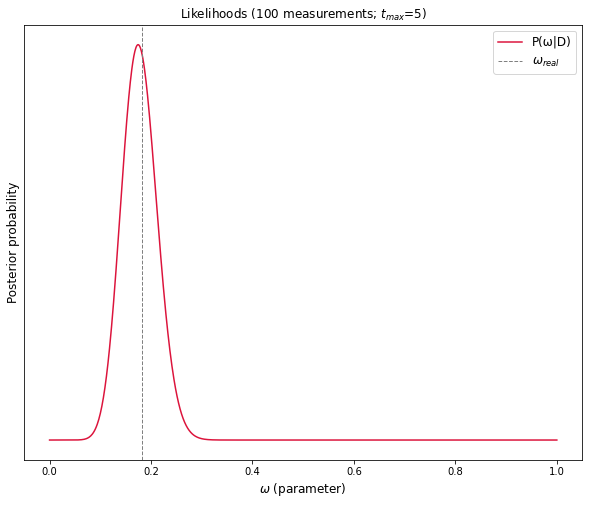

In [ ]:
w_real = 0.183
min, max = 0, 1

def measure(t):
  return np.random.binomial(1, np.cos(w_real*t/2)**2)

def simulate_likelihood(w, t, outcome):
  l = np.cos(w*t/2)**2 if outcome==1 else 1 - np.cos(w*t/2)**2
  return l

def cumulative_simulated_likelihood(data, w):
  cl = np.product([simulate_likelihood(w, t, outcome) for t,outcome in data])
  return cl

def plot_likelihood_aux(data, axs, tmax, nexp):
  xs = np.linspace(min,max,1000)
  ys = [cumulative_simulated_likelihood(data, x) for x in xs]
  ys = ys/np.sum(ys)
  label = "P(ω|D)"
  color = "crimson" 
  axs.plot(xs,ys,label=label,color=color)

def plot_likelihood(new_data=False):
  global nexp
  fig, axs = plt.subplots(1,figsize=(10,8))

  tmax = 5
  nexp = 100

  ts = np.linspace(0,tmax,nexp)
  data = [(t,measure(t)) for t in ts] if new_data else [(0.0, 1), (0.050505050505050504, 1), (0.10101010101010101, 1), (0.15151515151515152, 1), (0.20202020202020202, 1), (0.25252525252525254, 1), (0.30303030303030304, 1), (0.35353535353535354, 1), (0.40404040404040403, 1), (0.45454545454545453, 1), (0.5050505050505051, 1), (0.5555555555555556, 1), (0.6060606060606061, 1), (0.6565656565656566, 1), (0.7070707070707071, 1), (0.7575757575757576, 1), (0.8080808080808081, 1), (0.8585858585858586, 1), (0.9090909090909091, 1), (0.9595959595959596, 1), (1.0101010101010102, 1), (1.0606060606060606, 1), (1.1111111111111112, 1), (1.1616161616161615, 1), (1.2121212121212122, 1), (1.2626262626262625, 1), (1.3131313131313131, 1), (1.3636363636363635, 1), (1.4141414141414141, 1), (1.4646464646464645, 1), (1.5151515151515151, 1), (1.5656565656565655, 1), (1.6161616161616161, 1), (1.6666666666666667, 1), (1.7171717171717171, 1), (1.7676767676767677, 1), (1.8181818181818181, 1), (1.8686868686868687, 1), (1.9191919191919191, 1), (1.9696969696969697, 1), (2.0202020202020203, 1), (2.0707070707070705, 1), (2.121212121212121, 1), (2.1717171717171717, 1), (2.2222222222222223, 1), (2.2727272727272725, 1), (2.323232323232323, 1), (2.3737373737373737, 1), (2.4242424242424243, 1), (2.474747474747475, 1), (2.525252525252525, 1), (2.5757575757575757, 1), (2.6262626262626263, 1), (2.676767676767677, 1), (2.727272727272727, 1), (2.7777777777777777, 1), (2.8282828282828283, 1), (2.878787878787879, 1), (2.929292929292929, 1), (2.9797979797979797, 1), (3.0303030303030303, 1), (3.080808080808081, 1), (3.131313131313131, 1), (3.1818181818181817, 1), (3.2323232323232323, 1), (3.282828282828283, 1), (3.3333333333333335, 1), (3.3838383838383836, 1), (3.4343434343434343, 1), (3.484848484848485, 1), (3.5353535353535355, 1), (3.5858585858585856, 1), (3.6363636363636362, 1), (3.686868686868687, 1), (3.7373737373737375, 0), (3.7878787878787876, 1), (3.8383838383838382, 1), (3.888888888888889, 1), (3.9393939393939394, 1), (3.9898989898989896, 1), (4.040404040404041, 0), (4.090909090909091, 1), (4.141414141414141, 1), (4.191919191919192, 1), (4.242424242424242, 1), (4.292929292929293, 1), (4.343434343434343, 0), (4.393939393939394, 1), (4.444444444444445, 1), (4.494949494949495, 1), (4.545454545454545, 0), (4.595959595959596, 1), (4.646464646464646, 1), (4.696969696969697, 0), (4.747474747474747, 1), (4.797979797979798, 1), (4.848484848484849, 1), (4.898989898989899, 1), (4.94949494949495, 1), (5.0, 0)]

  plot_likelihood_aux(data, axs, tmax, nexp)

  plt.axvline(w_real, color="gray", linewidth=1, linestyle='dashed', 
              label = r"$ω_{real}$")
  axs.yaxis.set_ticks([])
  axs.legend(fontsize=12)
  plt.title("Likelihoods (%d measurements; $t_{max}$=%d)" % (nexp,tmax), fontsize=12)
  axs.set_xlabel("$ω$ (parameter)", fontsize=12)
  axs.set_ylabel("Posterior probability", fontsize=12)
  plt.show()

plot_likelihood()

## Log-probability

[(0.0, 1), (0.20408163265306123, 1), (0.40816326530612246, 1), (0.6122448979591837, 1), (0.8163265306122449, 1), (1.0204081632653061, 1), (1.2244897959183674, 1), (1.4285714285714286, 1), (1.6326530612244898, 1), (1.836734693877551, 1), (2.0408163265306123, 1), (2.2448979591836737, 1), (2.4489795918367347, 1), (2.6530612244897958, 1), (2.857142857142857, 1), (3.0612244897959187, 0), (3.2653061224489797, 1), (3.4693877551020407, 1), (3.673469387755102, 1), (3.8775510204081636, 1), (4.081632653061225, 1), (4.285714285714286, 1), (4.4897959183673475, 1), (4.6938775510204085, 1), (4.8979591836734695, 1), (5.1020408163265305, 1), (5.3061224489795915, 0), (5.510204081632653, 0), (5.714285714285714, 1), (5.918367346938775, 0), (6.122448979591837, 1), (6.326530612244898, 1), (6.530612244897959, 0), (6.73469387755102, 0), (6.938775510204081, 1), (7.142857142857143, 1), (7.346938775510204, 0), (7.551020408163265, 1), (7.755102040816327, 1), (7.959183673469388, 1), (8.16326530612245, 0), (8.36734

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in double_scalars


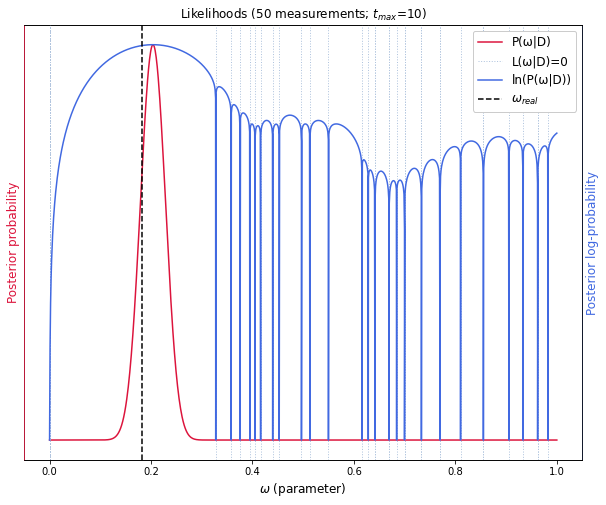

In [71]:
def measure(t):
  return np.random.binomial(1, np.cos(w_real*t/2)**2)

def simulate_likelihood(w, t, outcome):
  l = np.cos(w*t/2)**2 if outcome==1 else 1 - np.cos(w*t/2)**2
  return l

def likelihoods(data, w):
  ls = [simulate_likelihood(w, t, outcome) for t,outcome in data]
  return ls

w_real = 0.183
min, max = 0, 1

def plot_likelihood_aux(data, axs, which, tmax, nexp, log=True, asy_xs=[]):
  #xs = np.linspace(0.25,max,1000000)
  xs = np.linspace(min,max,1000)
  xs = np.concatenate([xs,asy_xs])
  xs = np.sort(xs)

  lss = [likelihoods(data, x) for x in xs]
  ys = [np.product(ls) for ls in lss]
  #ys = [y*len(xs)/np.sum(ys) for y in ys]
  if log:
    #ys = [np.sum([np.log(l) for l in ls]) for ls in lss]
    # Limited precision so correct at asymptotes, take some low value to represent -inf
    ys = [-200 if xs[i] in asy_xs else np.sum([np.log(l) for l in lss[i]]) for i in range(len(lss))]

  label = "ln(P(ω|D))"if log else "P(ω|D)"
  color = "crimson" if which==1 else "royalblue"
  
  axs.plot(xs,ys,label=label,color=color)
  

def plot_likelihoods(both = True, new_data = True):
  global nexp
  fig, axs = plt.subplots(1,figsize=(10,8))

  tmax = 10
  nexp = 50
  note = " (%d measurements; $t_{max}$=%d)" % (nexp,tmax)

  ts = np.linspace(0,tmax,nexp)
  data = [(t,measure(t)) for t in ts] if new_data else [(0.0, 1), (0.01001001001001001, 0), (0.02002002002002002, 0), (0.03003003003003003, 0), (0.04004004004004004, 0), (0.050050050050050046, 0), (0.06006006006006006, 0), (0.07007007007007007, 1), (0.08008008008008008, 0), (0.09009009009009009, 0), (0.10010010010010009, 0), (0.11011011011011011, 0), (0.12012012012012012, 1), (0.13013013013013014, 1), (0.14014014014014015, 1), (0.15015015015015015, 0), (0.16016016016016016, 1), (0.17017017017017017, 0), (0.18018018018018017, 0), (0.19019019019019018, 0), (0.20020020020020018, 1), (0.21021021021021022, 0), (0.22022022022022023, 0), (0.23023023023023023, 0), (0.24024024024024024, 0), (0.2502502502502503, 0), (0.2602602602602603, 0), (0.2702702702702703, 0), (0.2802802802802803, 1), (0.2902902902902903, 0), (0.3003003003003003, 1), (0.3103103103103103, 0), (0.3203203203203203, 0), (0.3303303303303303, 0), (0.34034034034034033, 0), (0.35035035035035034, 0), (0.36036036036036034, 0), (0.37037037037037035, 0), (0.38038038038038036, 0), (0.39039039039039036, 0), (0.40040040040040037, 1), (0.41041041041041043, 1), (0.42042042042042044, 0), (0.43043043043043044, 0), (0.44044044044044045, 1), (0.45045045045045046, 0), (0.46046046046046046, 0), (0.47047047047047047, 0), (0.4804804804804805, 0), (0.4904904904904905, 0), (0.5005005005005005, 0), (0.5105105105105106, 0), (0.5205205205205206, 1), (0.5305305305305306, 0), (0.5405405405405406, 1), (0.5505505505505506, 1), (0.5605605605605606, 1), (0.5705705705705706, 0), (0.5805805805805806, 0), (0.5905905905905906, 1), (0.6006006006006006, 0), (0.6106106106106106, 1), (0.6206206206206206, 1), (0.6306306306306306, 0), (0.6406406406406406, 1), (0.6506506506506506, 0), (0.6606606606606606, 0), (0.6706706706706707, 0), (0.6806806806806807, 1), (0.6906906906906907, 1), (0.7007007007007007, 1), (0.7107107107107107, 0), (0.7207207207207207, 0), (0.7307307307307307, 1), (0.7407407407407407, 0), (0.7507507507507507, 0), (0.7607607607607607, 0), (0.7707707707707707, 0), (0.7807807807807807, 0), (0.7907907907907907, 1), (0.8008008008008007, 1), (0.8108108108108109, 0), (0.8208208208208209, 0), (0.8308308308308309, 1), (0.8408408408408409, 1), (0.8508508508508509, 1), (0.8608608608608609, 0), (0.8708708708708709, 0), (0.8808808808808809, 0), (0.8908908908908909, 1), (0.9009009009009009, 0), (0.9109109109109109, 0), (0.9209209209209209, 1), (0.9309309309309309, 0), (0.9409409409409409, 0), (0.950950950950951, 1), (0.960960960960961, 1), (0.970970970970971, 0), (0.980980980980981, 0), (0.990990990990991, 1), (1.001001001001001, 1), (1.011011011011011, 0), (1.021021021021021, 0), (1.031031031031031, 0), (1.0410410410410411, 0), (1.0510510510510511, 1), (1.0610610610610611, 0), (1.0710710710710711, 0), (1.0810810810810811, 0), (1.0910910910910911, 1), (1.1011011011011012, 1), (1.1111111111111112, 1), (1.1211211211211212, 0), (1.1311311311311312, 0), (1.1411411411411412, 1), (1.1511511511511512, 1), (1.1611611611611612, 0), (1.1711711711711712, 1), (1.1811811811811812, 0), (1.1911911911911912, 1), (1.2012012012012012, 0), (1.2112112112112112, 1), (1.2212212212212212, 1), (1.2312312312312312, 0), (1.2412412412412412, 0), (1.2512512512512513, 1), (1.2612612612612613, 1), (1.2712712712712713, 0), (1.2812812812812813, 1), (1.2912912912912913, 1), (1.3013013013013013, 0), (1.3113113113113113, 1), (1.3213213213213213, 0), (1.3313313313313313, 0), (1.3413413413413413, 0), (1.3513513513513513, 0), (1.3613613613613613, 0), (1.3713713713713713, 1), (1.3813813813813813, 0), (1.3913913913913913, 0), (1.4014014014014013, 0), (1.4114114114114114, 1), (1.4214214214214214, 0), (1.4314314314314314, 0), (1.4414414414414414, 1), (1.4514514514514514, 0), (1.4614614614614614, 0), (1.4714714714714714, 0), (1.4814814814814814, 1), (1.4914914914914914, 0), (1.5015015015015014, 0), (1.5115115115115114, 0), (1.5215215215215214, 0), (1.5315315315315314, 0), (1.5415415415415414, 0), (1.5515515515515514, 0), (1.5615615615615615, 0), (1.5715715715715715, 0), (1.5815815815815815, 0), (1.5915915915915915, 0), (1.6016016016016015, 0), (1.6116116116116117, 0), (1.6216216216216217, 0), (1.6316316316316317, 0), (1.6416416416416417, 1), (1.6516516516516517, 0), (1.6616616616616617, 0), (1.6716716716716717, 0), (1.6816816816816818, 0), (1.6916916916916918, 1), (1.7017017017017018, 1), (1.7117117117117118, 0), (1.7217217217217218, 1), (1.7317317317317318, 0), (1.7417417417417418, 0), (1.7517517517517518, 0), (1.7617617617617618, 0), (1.7717717717717718, 0), (1.7817817817817818, 1), (1.7917917917917918, 0), (1.8018018018018018, 1), (1.8118118118118118, 0), (1.8218218218218218, 1), (1.8318318318318318, 0), (1.8418418418418419, 0), (1.8518518518518519, 0), (1.8618618618618619, 1), (1.8718718718718719, 0), (1.8818818818818819, 0), (1.8918918918918919, 0), (1.901901901901902, 0), (1.911911911911912, 0), (1.921921921921922, 0), (1.931931931931932, 0), (1.941941941941942, 0), (1.951951951951952, 0), (1.961961961961962, 0), (1.971971971971972, 0), (1.981981981981982, 0), (1.991991991991992, 0), (2.002002002002002, 0), (2.012012012012012, 0), (2.022022022022022, 0), (2.032032032032032, 0), (2.042042042042042, 0), (2.052052052052052, 0), (2.062062062062062, 0), (2.0720720720720722, 0), (2.0820820820820822, 0), (2.0920920920920922, 0), (2.1021021021021022, 1), (2.1121121121121122, 0), (2.1221221221221223, 0), (2.1321321321321323, 0), (2.1421421421421423, 0), (2.1521521521521523, 0), (2.1621621621621623, 1), (2.1721721721721723, 0), (2.1821821821821823, 1), (2.1921921921921923, 0), (2.2022022022022023, 1), (2.2122122122122123, 1), (2.2222222222222223, 0), (2.2322322322322323, 0), (2.2422422422422423, 0), (2.2522522522522523, 0), (2.2622622622622623, 0), (2.2722722722722724, 1), (2.2822822822822824, 0), (2.2922922922922924, 1), (2.3023023023023024, 0), (2.3123123123123124, 0), (2.3223223223223224, 1), (2.3323323323323324, 0), (2.3423423423423424, 0), (2.3523523523523524, 0), (2.3623623623623624, 0), (2.3723723723723724, 0), (2.3823823823823824, 0), (2.3923923923923924, 0), (2.4024024024024024, 0), (2.4124124124124124, 0), (2.4224224224224224, 0), (2.4324324324324325, 0), (2.4424424424424425, 0), (2.4524524524524525, 0), (2.4624624624624625, 1), (2.4724724724724725, 0), (2.4824824824824825, 0), (2.4924924924924925, 1), (2.5025025025025025, 1), (2.5125125125125125, 0), (2.5225225225225225, 0), (2.5325325325325325, 0), (2.5425425425425425, 0), (2.5525525525525525, 0), (2.5625625625625625, 0), (2.5725725725725725, 0), (2.5825825825825826, 0), (2.5925925925925926, 0), (2.6026026026026026, 0), (2.6126126126126126, 0), (2.6226226226226226, 0), (2.6326326326326326, 0), (2.6426426426426426, 0), (2.6526526526526526, 0), (2.6626626626626626, 0), (2.6726726726726726, 0), (2.6826826826826826, 1), (2.6926926926926926, 0), (2.7027027027027026, 0), (2.7127127127127126, 0), (2.7227227227227226, 0), (2.7327327327327327, 1), (2.7427427427427427, 1), (2.7527527527527527, 0), (2.7627627627627627, 0), (2.7727727727727727, 0), (2.7827827827827827, 0), (2.7927927927927927, 0), (2.8028028028028027, 0), (2.8128128128128127, 0), (2.8228228228228227, 0), (2.8328328328328327, 1), (2.8428428428428427, 0), (2.8528528528528527, 1), (2.8628628628628627, 0), (2.8728728728728727, 0), (2.8828828828828827, 0), (2.8928928928928928, 0), (2.9029029029029028, 0), (2.9129129129129128, 1), (2.9229229229229228, 0), (2.932932932932933, 0), (2.942942942942943, 0), (2.952952952952953, 0), (2.962962962962963, 0), (2.972972972972973, 0), (2.982982982982983, 1), (2.992992992992993, 0), (3.003003003003003, 0), (3.013013013013013, 0), (3.023023023023023, 0), (3.033033033033033, 1), (3.043043043043043, 0), (3.053053053053053, 0), (3.063063063063063, 0), (3.073073073073073, 0), (3.083083083083083, 1), (3.093093093093093, 1), (3.103103103103103, 0), (3.113113113113113, 1), (3.123123123123123, 0), (3.133133133133133, 1), (3.143143143143143, 1), (3.153153153153153, 0), (3.163163163163163, 1), (3.173173173173173, 0), (3.183183183183183, 0), (3.193193193193193, 1), (3.203203203203203, 1), (3.2132132132132134, 0), (3.2232232232232234, 0), (3.2332332332332334, 0), (3.2432432432432434, 0), (3.2532532532532534, 0), (3.2632632632632634, 0), (3.2732732732732734, 0), (3.2832832832832834, 0), (3.2932932932932935, 0), (3.3033033033033035, 1), (3.3133133133133135, 0), (3.3233233233233235, 0), (3.3333333333333335, 0), (3.3433433433433435, 0), (3.3533533533533535, 0), (3.3633633633633635, 0), (3.3733733733733735, 0), (3.3833833833833835, 0), (3.3933933933933935, 0), (3.4034034034034035, 1), (3.4134134134134135, 1), (3.4234234234234235, 0), (3.4334334334334335, 0), (3.4434434434434436, 0), (3.4534534534534536, 0), (3.4634634634634636, 0), (3.4734734734734736, 0), (3.4834834834834836, 0), (3.4934934934934936, 0), (3.5035035035035036, 0), (3.5135135135135136, 0), (3.5235235235235236, 0), (3.5335335335335336, 0), (3.5435435435435436, 0), (3.5535535535535536, 1), (3.5635635635635636, 1), (3.5735735735735736, 0), (3.5835835835835836, 0), (3.5935935935935936, 0), (3.6036036036036037, 1), (3.6136136136136137, 1), (3.6236236236236237, 0), (3.6336336336336337, 0), (3.6436436436436437, 0), (3.6536536536536537, 0), (3.6636636636636637, 1), (3.6736736736736737, 1), (3.6836836836836837, 0), (3.6936936936936937, 1), (3.7037037037037037, 0), (3.7137137137137137, 1), (3.7237237237237237, 0), (3.7337337337337337, 0), (3.7437437437437437, 0), (3.7537537537537538, 0), (3.7637637637637638, 0), (3.7737737737737738, 0), (3.7837837837837838, 0), (3.793793793793794, 0), (3.803803803803804, 0), (3.813813813813814, 0), (3.823823823823824, 0), (3.833833833833834, 1), (3.843843843843844, 0), (3.853853853853854, 1), (3.863863863863864, 0), (3.873873873873874, 0), (3.883883883883884, 0), (3.893893893893894, 0), (3.903903903903904, 0), (3.913913913913914, 0), (3.923923923923924, 0), (3.933933933933934, 1), (3.943943943943944, 0), (3.953953953953954, 1), (3.963963963963964, 0), (3.973973973973974, 0), (3.983983983983984, 0), (3.993993993993994, 1), (4.004004004004004, 0), (4.014014014014014, 1), (4.024024024024024, 0), (4.034034034034034, 1), (4.044044044044044, 0), (4.054054054054054, 1), (4.064064064064064, 0), (4.074074074074074, 1), (4.084084084084084, 1), (4.094094094094094, 0), (4.104104104104104, 0), (4.114114114114114, 0), (4.124124124124124, 0), (4.134134134134134, 0), (4.1441441441441444, 0), (4.1541541541541545, 1), (4.1641641641641645, 1), (4.1741741741741745, 1), (4.1841841841841845, 1), (4.1941941941941945, 1), (4.2042042042042045, 0), (4.2142142142142145, 0), (4.2242242242242245, 0), (4.2342342342342345, 1), (4.2442442442442445, 0), (4.2542542542542545, 1), (4.2642642642642645, 0), (4.2742742742742745, 1), (4.2842842842842845, 1), (4.2942942942942945, 0), (4.3043043043043046, 0), (4.314314314314315, 0), (4.324324324324325, 0), (4.334334334334335, 1), (4.344344344344345, 0), (4.354354354354355, 0), (4.364364364364365, 0), (4.374374374374375, 1), (4.384384384384385, 1), (4.394394394394395, 0), (4.404404404404405, 0), (4.414414414414415, 0), (4.424424424424425, 0), (4.434434434434435, 0), (4.444444444444445, 0), (4.454454454454455, 0), (4.464464464464465, 0), (4.474474474474475, 1), (4.484484484484485, 0), (4.494494494494495, 0), (4.504504504504505, 0), (4.514514514514515, 0), (4.524524524524525, 0), (4.534534534534535, 0), (4.544544544544545, 1), (4.554554554554555, 0), (4.564564564564565, 0), (4.574574574574575, 0), (4.584584584584585, 0), (4.594594594594595, 0), (4.604604604604605, 0), (4.614614614614615, 1), (4.624624624624625, 1), (4.634634634634635, 1), (4.644644644644645, 0), (4.654654654654655, 0), (4.664664664664665, 0), (4.674674674674675, 0), (4.684684684684685, 0), (4.694694694694695, 0), (4.704704704704705, 1), (4.714714714714715, 1), (4.724724724724725, 0), (4.734734734734735, 1), (4.744744744744745, 0), (4.754754754754755, 1), (4.764764764764765, 0), (4.774774774774775, 0), (4.784784784784785, 0), (4.794794794794795, 0), (4.804804804804805, 1), (4.814814814814815, 0), (4.824824824824825, 0), (4.834834834834835, 0), (4.844844844844845, 0), (4.854854854854855, 0), (4.864864864864865, 0), (4.874874874874875, 0), (4.884884884884885, 0), (4.894894894894895, 0), (4.904904904904905, 0), (4.914914914914915, 0), (4.924924924924925, 0), (4.934934934934935, 0), (4.944944944944945, 1), (4.954954954954955, 0), (4.964964964964965, 0), (4.974974974974975, 1), (4.984984984984985, 0), (4.994994994994995, 1), (5.005005005005005, 1), (5.015015015015015, 1), (5.025025025025025, 0), (5.035035035035035, 0), (5.045045045045045, 1), (5.055055055055055, 0), (5.065065065065065, 0), (5.075075075075075, 1), (5.085085085085085, 1), (5.095095095095095, 0), (5.105105105105105, 0), (5.115115115115115, 0), (5.125125125125125, 1), (5.135135135135135, 1), (5.145145145145145, 0), (5.155155155155155, 1), (5.165165165165165, 0), (5.175175175175175, 0), (5.185185185185185, 0), (5.195195195195195, 1), (5.205205205205205, 0), (5.215215215215215, 1), (5.225225225225225, 1), (5.235235235235235, 0), (5.245245245245245, 1), (5.255255255255255, 1), (5.265265265265265, 0), (5.275275275275275, 1), (5.285285285285285, 1), (5.295295295295295, 0), (5.305305305305305, 0), (5.315315315315315, 1), (5.325325325325325, 0), (5.335335335335335, 0), (5.345345345345345, 0), (5.355355355355355, 0), (5.365365365365365, 1), (5.375375375375375, 0), (5.385385385385385, 0), (5.395395395395395, 0), (5.405405405405405, 0), (5.415415415415415, 0), (5.425425425425425, 0), (5.435435435435435, 0), (5.445445445445445, 0), (5.455455455455455, 1), (5.465465465465465, 0), (5.475475475475475, 0), (5.485485485485485, 1), (5.495495495495495, 1), (5.505505505505505, 0), (5.515515515515515, 0), (5.525525525525525, 0), (5.535535535535535, 0), (5.545545545545545, 1), (5.555555555555555, 1), (5.565565565565565, 0), (5.575575575575575, 0), (5.585585585585585, 0), (5.595595595595595, 0), (5.605605605605605, 0), (5.615615615615615, 0), (5.625625625625625, 1), (5.635635635635635, 0), (5.645645645645645, 0), (5.655655655655655, 0), (5.665665665665665, 0), (5.675675675675675, 0), (5.685685685685685, 0), (5.6956956956956954, 1), (5.7057057057057055, 1), (5.7157157157157155, 1), (5.7257257257257255, 1), (5.7357357357357355, 0), (5.7457457457457455, 0), (5.7557557557557555, 1), (5.7657657657657655, 1), (5.7757757757757755, 1), (5.7857857857857855, 0), (5.7957957957957955, 0), (5.8058058058058055, 1), (5.8158158158158155, 1), (5.8258258258258255, 0), (5.8358358358358355, 0), (5.8458458458458455, 0), (5.8558558558558556, 1), (5.865865865865866, 0), (5.875875875875876, 1), (5.885885885885886, 0), (5.895895895895896, 0), (5.905905905905906, 1), (5.915915915915916, 0), (5.925925925925926, 0), (5.935935935935936, 0), (5.945945945945946, 0), (5.955955955955956, 0), (5.965965965965966, 1), (5.975975975975976, 0), (5.985985985985986, 1), (5.995995995995996, 0), (6.006006006006006, 0), (6.016016016016016, 0), (6.026026026026026, 0), (6.036036036036036, 1), (6.046046046046046, 0), (6.056056056056056, 0), (6.066066066066066, 0), (6.076076076076076, 0), (6.086086086086086, 1), (6.096096096096096, 0), (6.106106106106106, 1), (6.116116116116116, 1), (6.126126126126126, 0), (6.136136136136136, 1), (6.146146146146146, 0), (6.156156156156156, 1), (6.166166166166166, 1), (6.176176176176176, 1), (6.186186186186186, 0), (6.196196196196196, 1), (6.206206206206206, 0), (6.216216216216216, 0), (6.226226226226226, 0), (6.236236236236236, 0), (6.246246246246246, 1), (6.256256256256256, 1), (6.266266266266266, 1), (6.276276276276276, 0), (6.286286286286286, 0), (6.296296296296296, 1), (6.306306306306306, 1), (6.316316316316316, 1), (6.326326326326326, 0), (6.336336336336336, 0), (6.346346346346346, 1), (6.356356356356356, 1), (6.366366366366366, 0), (6.376376376376376, 0), (6.386386386386386, 1), (6.396396396396396, 1), (6.406406406406406, 1), (6.416416416416417, 0), (6.426426426426427, 0), (6.436436436436437, 1), (6.446446446446447, 0), (6.456456456456457, 0), (6.466466466466467, 0), (6.476476476476477, 0), (6.486486486486487, 0), (6.496496496496497, 0), (6.506506506506507, 0), (6.516516516516517, 1), (6.526526526526527, 0), (6.536536536536537, 0), (6.546546546546547, 0), (6.556556556556557, 0), (6.566566566566567, 0), (6.576576576576577, 1), (6.586586586586587, 0), (6.596596596596597, 0), (6.606606606606607, 1), (6.616616616616617, 0), (6.626626626626627, 0), (6.636636636636637, 0), (6.646646646646647, 0), (6.656656656656657, 0), (6.666666666666667, 0), (6.676676676676677, 0), (6.686686686686687, 0), (6.696696696696697, 0), (6.706706706706707, 0), (6.716716716716717, 0), (6.726726726726727, 0), (6.736736736736737, 1), (6.746746746746747, 0), (6.756756756756757, 1), (6.766766766766767, 1), (6.776776776776777, 0), (6.786786786786787, 0), (6.796796796796797, 0), (6.806806806806807, 0), (6.816816816816817, 0), (6.826826826826827, 1), (6.836836836836837, 0), (6.846846846846847, 0), (6.856856856856857, 0), (6.866866866866867, 0), (6.876876876876877, 0), (6.886886886886887, 1), (6.896896896896897, 0), (6.906906906906907, 0), (6.916916916916917, 0), (6.926926926926927, 1), (6.936936936936937, 0), (6.946946946946947, 1), (6.956956956956957, 0), (6.966966966966967, 1), (6.976976976976977, 1), (6.986986986986987, 1), (6.996996996996997, 0), (7.007007007007007, 0), (7.017017017017017, 0), (7.027027027027027, 0), (7.037037037037037, 0), (7.047047047047047, 0), (7.057057057057057, 0), (7.067067067067067, 0), (7.077077077077077, 1), (7.087087087087087, 0), (7.097097097097097, 0), (7.107107107107107, 1), (7.117117117117117, 1), (7.127127127127127, 1), (7.137137137137137, 0), (7.147147147147147, 0), (7.157157157157157, 0), (7.167167167167167, 1), (7.177177177177177, 0), (7.187187187187187, 1), (7.197197197197197, 0), (7.207207207207207, 0), (7.217217217217217, 0), (7.227227227227227, 0), (7.237237237237237, 0), (7.247247247247247, 0), (7.257257257257257, 0), (7.267267267267267, 1), (7.277277277277277, 0), (7.287287287287287, 0), (7.297297297297297, 0), (7.307307307307307, 0), (7.317317317317317, 0), (7.327327327327327, 0), (7.337337337337337, 1), (7.347347347347347, 0), (7.357357357357357, 1), (7.367367367367367, 1), (7.377377377377377, 0), (7.387387387387387, 0), (7.397397397397397, 0), (7.407407407407407, 0), (7.4174174174174174, 0), (7.4274274274274275, 0), (7.4374374374374375, 0), (7.4474474474474475, 0), (7.4574574574574575, 0), (7.4674674674674675, 0), (7.4774774774774775, 1), (7.4874874874874875, 0), (7.4974974974974975, 0), (7.5075075075075075, 0), (7.5175175175175175, 1), (7.5275275275275275, 1), (7.5375375375375375, 0), (7.5475475475475475, 1), (7.5575575575575575, 1), (7.5675675675675675, 1), (7.5775775775775776, 1), (7.587587587587588, 1), (7.597597597597598, 0), (7.607607607607608, 1), (7.617617617617618, 0), (7.627627627627628, 1), (7.637637637637638, 0), (7.647647647647648, 1), (7.657657657657658, 0), (7.667667667667668, 0), (7.677677677677678, 0), (7.687687687687688, 0), (7.697697697697698, 1), (7.707707707707708, 0), (7.717717717717718, 0), (7.727727727727728, 1), (7.737737737737738, 1), (7.747747747747748, 0), (7.757757757757758, 1), (7.767767767767768, 0), (7.777777777777778, 0), (7.787787787787788, 0), (7.797797797797798, 0), (7.807807807807808, 1), (7.817817817817818, 0), (7.827827827827828, 0), (7.837837837837838, 1), (7.847847847847848, 0), (7.857857857857858, 0), (7.867867867867868, 0), (7.877877877877878, 0), (7.887887887887888, 1), (7.897897897897898, 1), (7.907907907907908, 0), (7.917917917917918, 0), (7.927927927927928, 0), (7.937937937937938, 1), (7.947947947947948, 0), (7.957957957957958, 0), (7.967967967967968, 1), (7.977977977977978, 1), (7.987987987987988, 0), (7.997997997997998, 0), (8.008008008008009, 0), (8.018018018018019, 0), (8.028028028028029, 0), (8.038038038038039, 0), (8.048048048048049, 1), (8.058058058058059, 0), (8.068068068068069, 0), (8.078078078078079, 0), (8.088088088088089, 0), (8.098098098098099, 0), (8.108108108108109, 0), (8.118118118118119, 0), (8.128128128128129, 0), (8.138138138138139, 0), (8.148148148148149, 1), (8.158158158158159, 0), (8.168168168168169, 0), (8.178178178178179, 1), (8.188188188188189, 1), (8.198198198198199, 0), (8.208208208208209, 0), (8.218218218218219, 0), (8.228228228228229, 1), (8.238238238238239, 0), (8.248248248248249, 0), (8.258258258258259, 0), (8.268268268268269, 0), (8.278278278278279, 0), (8.288288288288289, 0), (8.298298298298299, 1), (8.308308308308309, 1), (8.318318318318319, 0), (8.328328328328329, 0), (8.338338338338339, 0), (8.348348348348349, 1), (8.358358358358359, 1), (8.368368368368369, 0), (8.378378378378379, 0), (8.388388388388389, 0), (8.398398398398399, 1), (8.408408408408409, 0), (8.418418418418419, 0), (8.428428428428429, 0), (8.438438438438439, 0), (8.448448448448449, 0), (8.458458458458459, 0), (8.468468468468469, 0), (8.478478478478479, 1), (8.488488488488489, 0), (8.498498498498499, 0), (8.508508508508509, 0), (8.518518518518519, 0), (8.528528528528529, 0), (8.538538538538539, 0), (8.548548548548549, 0), (8.558558558558559, 0), (8.568568568568569, 1), (8.578578578578579, 0), (8.588588588588589, 1), (8.598598598598599, 1), (8.608608608608609, 0), (8.618618618618619, 0), (8.62862862862863, 0), (8.63863863863864, 0), (8.64864864864865, 0), (8.65865865865866, 0), (8.66866866866867, 0), (8.67867867867868, 0), (8.68868868868869, 0), (8.6986986986987, 0), (8.70870870870871, 0), (8.71871871871872, 1), (8.72872872872873, 0), (8.73873873873874, 1), (8.74874874874875, 0), (8.75875875875876, 1), (8.76876876876877, 0), (8.77877877877878, 0), (8.78878878878879, 0), (8.7987987987988, 0), (8.80880880880881, 0), (8.81881881881882, 1), (8.82882882882883, 1), (8.83883883883884, 0), (8.84884884884885, 0), (8.85885885885886, 1), (8.86886886886887, 1), (8.87887887887888, 0), (8.88888888888889, 0), (8.8988988988989, 0), (8.90890890890891, 0), (8.91891891891892, 0), (8.92892892892893, 0), (8.93893893893894, 1), (8.94894894894895, 0), (8.95895895895896, 0), (8.96896896896897, 0), (8.97897897897898, 1), (8.98898898898899, 0), (8.998998998999, 1), (9.00900900900901, 1), (9.01901901901902, 1), (9.02902902902903, 0), (9.03903903903904, 1), (9.04904904904905, 1), (9.05905905905906, 0), (9.06906906906907, 0), (9.07907907907908, 0), (9.08908908908909, 1), (9.0990990990991, 0), (9.10910910910911, 0), (9.11911911911912, 0), (9.12912912912913, 1), (9.13913913913914, 0), (9.14914914914915, 1), (9.15915915915916, 1), (9.16916916916917, 0), (9.17917917917918, 0), (9.18918918918919, 0), (9.1991991991992, 1), (9.20920920920921, 0), (9.21921921921922, 0), (9.22922922922923, 0), (9.23923923923924, 1), (9.24924924924925, 1), (9.25925925925926, 0), (9.26926926926927, 1), (9.27927927927928, 0), (9.28928928928929, 0), (9.2992992992993, 0), (9.30930930930931, 0), (9.31931931931932, 0), (9.32932932932933, 0), (9.33933933933934, 0), (9.34934934934935, 0), (9.35935935935936, 0), (9.36936936936937, 0), (9.37937937937938, 1), (9.38938938938939, 0), (9.3993993993994, 0), (9.40940940940941, 1), (9.41941941941942, 0), (9.42942942942943, 0), (9.43943943943944, 0), (9.44944944944945, 0), (9.45945945945946, 1), (9.46946946946947, 0), (9.47947947947948, 0), (9.48948948948949, 0), (9.4994994994995, 1), (9.50950950950951, 1), (9.51951951951952, 0), (9.52952952952953, 0), (9.53953953953954, 1), (9.54954954954955, 0), (9.55955955955956, 0), (9.56956956956957, 0), (9.57957957957958, 1), (9.58958958958959, 0), (9.5995995995996, 0), (9.60960960960961, 1), (9.61961961961962, 0), (9.62962962962963, 0), (9.63963963963964, 0), (9.64964964964965, 0), (9.65965965965966, 1), (9.66966966966967, 0), (9.67967967967968, 0), (9.68968968968969, 0), (9.6996996996997, 0), (9.70970970970971, 0), (9.71971971971972, 0), (9.72972972972973, 0), (9.73973973973974, 0), (9.74974974974975, 1), (9.75975975975976, 0), (9.76976976976977, 0), (9.77977977977978, 0), (9.78978978978979, 1), (9.7997997997998, 1), (9.80980980980981, 0), (9.81981981981982, 1), (9.82982982982983, 0), (9.83983983983984, 1), (9.84984984984985, 0), (9.85985985985986, 1), (9.86986986986987, 0), (9.87987987987988, 0), (9.88988988988989, 1), (9.8998998998999, 0), (9.90990990990991, 0), (9.91991991991992, 0), (9.92992992992993, 1), (9.93993993993994, 0), (9.94994994994995, 0), (9.95995995995996, 0), (9.96996996996997, 1), (9.97997997997998, 0), (9.98998998998999, 1), (10.0, 1)]

  if new_data:
    print(data)
  else:
    nexp = len(data)

  plot_likelihood_aux(data, axs, 1, tmax, nexp, log=False)
  if both:
    # Asymptotes.
    asy = ([n*np.pi/t  for n in range(1,4,2) for t,o in data if n*np.pi/t<max and o==1] 
           + [2*n*np.pi/t  for n in range(0,4) for t,o in data if 2*n*np.pi/t<max and o==0])
    log_ax = axs.twinx()
    
    log_ax.set_ylabel("Posterior log-probability", fontsize=12, color="royalblue")
    axs.spines['right'].set_color('royalblue')
    log_ax.spines['left'].set_color('crimson')

    [plt.axvline(a, color="lightsteelblue", linewidth=1,linestyle='dotted', 
              label="L(ω|D)=0") 
    for a in asy]

    plot_likelihood_aux(data, log_ax, 0, tmax, nexp, log=True, asy_xs=asy)

  # for n in range(4):
  #   asy = [n*np.pi/t for t in ts if n*np.pi/t<max]]
  #   a=[plt.axvline(n*np.pi/t, color="lightsteelblue", linewidth=1,linestyle='dashed', 
  #                label="L(ω|D)=0") 
  #   for t in ts if n*np.pi/t<max]

  plt.axvline(w_real, color="black", linewidth=1.5, linestyle='dashed', 
              label = r"$ω_{real}$")
  axs.yaxis.set_ticks([]); log_ax.yaxis.set_ticks([])

  lines, labels = axs.get_legend_handles_labels()
  lines2, labels2 = log_ax.get_legend_handles_labels()
  plt.legend(lines + lines2[-3:], labels + labels2[-3:], fontsize=12,framealpha=1,loc='upper right')

  plt.title("Likelihoods" + note, fontsize=12)
  axs.set_xlabel("$ω$ (parameter)", fontsize=12)
  axs.set_ylabel("Posterior probability", fontsize=12, color="crimson" if both else "black")
  plt.show()

plot_likelihoods()
import sys
print()

In [ ]:
def measure(t):
  return np.random.binomial(1, np.cos(w_real*t/2)**2)

def simulate_likelihood(w, t, outcome, log):
  l = np.cos(w*t/2)**2 if outcome==1 else 1 - np.cos(w*t/2)**2
  l = np.log(l) if log else l
  return l

def cumulative_simulated_likelihood(data, w, log):
  if not log:
    cl = np.product([simulate_likelihood(w, t, outcome, log) for t,outcome in data])
  else:
    ls = [simulate_likelihood(w, t, outcome, log) for t,outcome in data]
    cl = np.sum(ls)
  return cl

## Effect of the tmax magnitude

[(0.0, 1), (0.10101010101010101, 1), (0.20202020202020202, 1), (0.30303030303030304, 1), (0.40404040404040403, 1), (0.5050505050505051, 0), (0.6060606060606061, 1), (0.7070707070707071, 1), (0.8080808080808081, 1), (0.9090909090909091, 1), (1.0101010101010102, 1), (1.1111111111111112, 0), (1.2121212121212122, 1), (1.3131313131313131, 1), (1.4141414141414141, 1), (1.5151515151515151, 0), (1.6161616161616161, 1), (1.7171717171717171, 1), (1.8181818181818181, 1), (1.9191919191919191, 1), (2.0202020202020203, 1), (2.121212121212121, 1), (2.2222222222222223, 1), (2.323232323232323, 1), (2.4242424242424243, 1), (2.525252525252525, 1), (2.6262626262626263, 1), (2.727272727272727, 1), (2.8282828282828283, 1), (2.929292929292929, 1), (3.0303030303030303, 0), (3.131313131313131, 1), (3.2323232323232323, 0), (3.3333333333333335, 1), (3.4343434343434343, 1), (3.5353535353535355, 1), (3.6363636363636362, 1), (3.7373737373737375, 1), (3.8383838383838382, 1), (3.9393939393939394, 1), (4.0404040404040

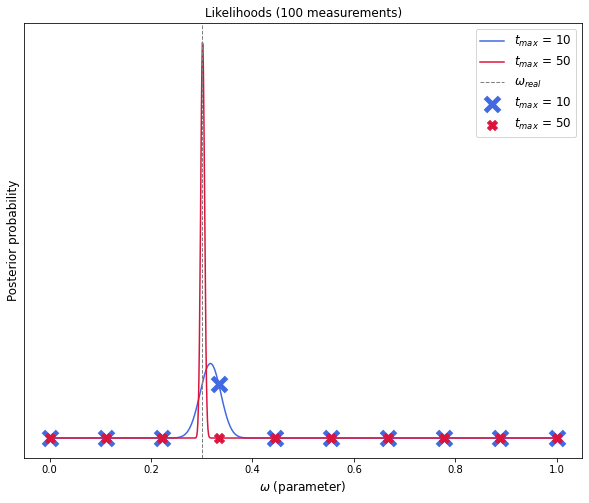

In [113]:
w_real = 0.3
min, max = 0, 1

def measure(t):
  return np.random.binomial(1, np.cos(w_real*t/2)**2)

def simulate_likelihood(w, t, outcome, log):
  l = np.cos(w*t/2)**2 if outcome==1 else 1 - np.cos(w*t/2)**2
  l = np.log(l) if log else l
  return l

def cumulative_simulated_likelihood(data, w, log):
  if not log:
    cl = np.product([simulate_likelihood(w, t, outcome, log) for t,outcome in data])
  else:
    ls = [simulate_likelihood(w, t, outcome, log) for t,outcome in data]
    cl = np.sum(ls)
  return cl

def plot_likelihood(data, axs, which, tmax, nexp, label_extra, log=False):
  xs = np.linspace(min,max,1000)
  ys = [cumulative_simulated_likelihood(data, x, log) for x in xs]
  norm = np.sum(ys)
  ys = ys/norm
  label = "$t_{max}$ = " + str(tmax) + label_extra
  color = "crimson" if which==1 else "royalblue"
  axs.plot(xs,ys,label=label,color=color,zorder=-1)

  scatter_xs = np.linspace(min,max,10)
  scatter_ys = [cumulative_simulated_likelihood(data, x, log) for x in scatter_xs]
  scatter_ys = scatter_ys/norm
  axs.scatter(scatter_xs,scatter_ys,label=label,color=color, 
              marker='X' if which else 'x',
              s=100 if which else 200,
              linewidth=1 if which else 5,
              zorder=1)

def plot_likelihoods(new_data = True):
  global nexp
  fig, axs = plt.subplots(1,figsize=(10,8))

  tmax1, tmax2 = 10, 50
  nexp1, nexp2 = 100, 100
  nexp_info1 = " (%d measurements)" % nexp1
  nexp_info2 = " (%d measurements)" % nexp2
  label_extra1 = nexp_info1 if nexp1!=nexp2 else ""
  label_extra2 = nexp_info2 if nexp1!=nexp2 else ""
  title_extra = nexp_info1 if nexp1==nexp2 else ""

  ts1 = np.linspace(0,tmax1,nexp1)
  data1 = [(t,measure(t)) for t in ts1] if new_data else [(0.0, 1), (0.1111111111111111, 1), (0.2222222222222222, 1), (0.3333333333333333, 0), (0.4444444444444444, 1), (0.5555555555555556, 1), (0.6666666666666666, 0), (0.7777777777777777, 0), (0.8888888888888888, 0), (1.0, 0)]
  if new_data:
    print(data1)
  plot_likelihood(data1, axs, 0, tmax1, nexp1, label_extra1)

  ts2 = np.linspace(0,tmax2,nexp2)
  data2 = [(t,measure(t)) for t in ts2] if new_data else [(0.0, 1), (0.5555555555555556, 1), (1.1111111111111112, 0), (1.6666666666666667, 0), (2.2222222222222223, 1), (2.7777777777777777, 1), (3.3333333333333335, 0), (3.8888888888888893, 0), (4.444444444444445, 1), (5.0, 0)]
  if new_data:
    print(data2)
  plot_likelihood(data2, axs, 1, tmax2, nexp2, label_extra2)

  plt.axvline(w_real, color="gray", linewidth=1, linestyle='dashed', 
              label = r"$ω_{real}$")
  axs.yaxis.set_ticks([])
  axs.legend(fontsize=12)
  plt.title("Likelihoods" + title_extra, fontsize=12)
  axs.set_xlabel("$ω$ (parameter)", fontsize=12)
  axs.set_ylabel("Posterior probability", fontsize=12)
  plt.show()

plot_likelihoods()